# Hapi

## Conceptual Distributed Hydrological Model

- Please change the Path in the following cell to the directory where you stored the case study data

In [1]:
Comp = "F:/01Algorithms/Hydrology/HAPI"
import os


os.chdir("../../../")
os.getcwd()

'C:\\MyComputer\\01Algorithms\\Hydrology\\Hapi'

### Import Modules

In [2]:
import datetime as dt
from Hapi.run import Run
from Hapi.catchment import Catchment
import Hapi.rrm.hbv_bergestrom92 as HBV

### Paths

In [5]:
Path = "Examples/Hydrological model/data/distributed_model"
PrecPath = Path + "/prec"
Evap_Path = Path + "/evap"
TempPath = Path + "/temp"
FlowAccPath = Path + "/GIS/acc4000.tif"
FlowDPath = Path + "/GIS/fd4000.tif"

ParPathRun = Path + "/Parameter set-Avg/"

### Meteorological data

In [7]:
AreaCoeff = 1530
InitialCond = [0, 5, 5, 5, 0]
Snow = 0
"""
Create the model object and read the input data
"""
start = "2009-01-01"
end = "2009-04-10"
name = "Coello"
Coello = Catchment(name, start, end, SpatialResolution="Distributed")
Coello.ReadRainfall(PrecPath)
Coello.ReadTemperature(TempPath)
Coello.ReadET(Evap_Path)

Coello.ReadFlowAcc(FlowAccPath)
Coello.ReadFlowDir(FlowDPath)
Coello.ReadParameters(ParPathRun, Snow)
Coello.ReadLumpedModel(HBV, AreaCoeff, InitialCond)

2022-03-19 23:55:35.000 | DEBUG    | catchment:ReadRainfall:200 - Rainfall data are read successfully
2022-03-19 23:55:35.022 | DEBUG    | catchment:ReadTemperature:253 - Temperature data are read successfully
2022-03-19 23:55:35.058 | DEBUG    | catchment:ReadET:295 - Potential Evapotranspiration data are read successfully
2022-03-19 23:55:35.058 | DEBUG    | catchment:ReadFlowAcc:387 - Flow Accmulation input is read successfully
2022-03-19 23:55:35.074 | DEBUG    | catchment:ReadFlowDir:441 - Flow Direction input is read successfully
2022-03-19 23:55:35.074 | DEBUG    | catchment:ReadParameters:624 - Parameters are read successfully
2022-03-19 23:55:35.074 | DEBUG    | catchment:ReadLumpedModel:678 - Lumped model is read successfully


## Gauges

In [8]:
Coello.ReadGaugeTable(Path + "/stations/gauges.csv", FlowAccPath)
GaugesPath = Path + "/stations/"
Coello.ReadDischargeGauges(GaugesPath, column='id', fmt="%Y-%m-%d")

2022-03-19 23:55:40.105 | DEBUG    | catchment:ReadGaugeTable:773 - Gauge Table is read successfully
2022-03-19 23:55:40.790 | DEBUG    | catchment:ReadDischargeGauges:867 - Gauges data are read successfully


In [9]:
Coello.GaugesTable

,id,name,x,y,original area,area,area ratio,weight,cell_row,cell_col
0,1,Station 1,454795.6728,503143.3264,124.0659,64,1.938530,0.06,4.0,5.0
1,2,Station 2,443847.5736,481850.7151,83.0025,96,0.864609,0.08,9.0,2.0
2,3,station 3,454044.6935,481189.4256,44.8587,16,2.803669,0.02,9.0,5.0
3,4,Station 4,464533.7067,502683.6482,91.4949,80,1.143686,0.07,4.0,7.0
4,5,Station 5,463231.1242,486656.3455,730.1259,784,0.931283,0.38,8.0,7.0
5,6,ExitPoint_coello basin,487292.5152,478045.5720,1453.9185,1408,1.032613,0.40,10.0,13.0


# Run the model

Outputs:
----------
    1-statevariables: [numpy attribute]
        4D array (rows,cols,time,states) states are [sp,wc,sm,uz,lv]
    2-qlz: [numpy attribute]
        3D array of the lower zone discharge
    3-quz: [numpy attribute]
        3D array of the upper zone discharge
    4-qout: [numpy attribute]
        1D timeseries of discharge at the outlet of the catchment
        of unit m3/sec
    5-quz_routed: [numpy attribute]
        3D array of the upper zone discharge  accumulated and
        routed at each time step
    6-qlz_translated: [numpy attribute]
        3D array of the lower zone discharge translated at each time step


In [10]:
Run.RunHapi(Coello)

Model Run has finished


In [11]:
import numpy as np


np.shape(Coello.Qtot)

(13, 14, 101)

In [12]:
Coello.GaugesTable['area ratio'].tolist()

[1.938529688, 0.864609375, 2.80366875, 1.14368625, 0.931283036, 1.032612571]

In [13]:
Coello.ExtractDischarge()

for i in range(len(Coello.GaugesTable)):
    gaugeid = Coello.GaugesTable.loc[i, 'id']
    print("----------------------------------")
    print("Gauge - " + str(gaugeid))
    print("RMSE= " + str(round(Coello.Metrics.loc['RMSE', gaugeid], 2)))
    print("NSE= " + str(round(Coello.Metrics.loc['NSE', gaugeid], 2)))
    print("NSEhf= " + str(round(Coello.Metrics.loc['NSEhf', gaugeid], 2)))
    print("KGE= " + str(round(Coello.Metrics.loc['KGE', gaugeid], 2)))
    print("WB= " + str(round(Coello.Metrics.loc['WB', gaugeid], 2)))
    print("Pearson CC= " + str(round(Coello.Metrics.loc['Pearson-CC', gaugeid], 2)))
    print("R2 = " + str(round(Coello.Metrics.loc['R2', gaugeid], 2)))

----------------------------------
Gauge - 1
RMSE= 3.42
NSE= -39.26
NSEhf= -34.46
KGE= -2.52
WB= 52.92
Pearson CC= 0.0
R2 = -39.26
----------------------------------
Gauge - 2
RMSE= 5.7
NSE= -171.22
NSEhf= -155.6
KGE= -10.38
WB= 73.11
Pearson CC= 0.29
R2 = -171.22
----------------------------------
Gauge - 3
RMSE= 1.81
NSE= -61.56
NSEhf= -60.02
KGE= -5.56
WB= 86.81
Pearson CC= 0.13
R2 = -61.56
----------------------------------
Gauge - 4
RMSE= 8.92
NSE= -25.04
NSEhf= -26.19
KGE= -0.53
WB= 28.22
Pearson CC= 0.06
R2 = -25.04
----------------------------------
Gauge - 5
RMSE= 32.47
NSE= -174.16
NSEhf= -122.3
KGE= -8.1
WB= -153.96
Pearson CC= 0.06
R2 = -174.16
----------------------------------
Gauge - 6
RMSE= 37.8
NSE= -3.75
NSEhf= -3.0
KGE= -0.4
WB= 92.8
Pearson CC= 0.06
R2 = -3.75


In [14]:
Coello.Metrics

,1,2,3,4,5,6
RMSE,3.423,5.696,1.813,8.919,32.465,37.804
NSE,-39.257,-171.22,-61.562,-25.038,-174.16,-3.749
NSEhf,-34.457,-155.6,-60.017,-26.189,-122.297,-3.003
KGE,-2.516,-10.377,-5.565,-0.529,-8.1,-0.403
WB,52.922,73.11,86.813,28.221,-153.961,92.8
Pearson-CC,0.002,0.289,0.128,0.059,0.055,0.058
R2,-39.257,-171.22,-61.562,-25.038,-174.16,-3.749


In [15]:
Coello.Qtot[0, 0, 0]

0.0

### Calculate performance criteria

### Plot Hydrographs

2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1142 - ----------------------------------
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1143 - Gauge - 6
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1144 - RMSE= 37.8
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1145 - NSE= -3.75
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1146 - NSEhf= -3.0
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1147 - KGE= -0.4
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1148 - WB= 92.8
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1149 - Pearson-CC= 0.06
2022-03-19 23:56:20.760 | DEBUG    | catchment:PlotHydrograph:1152 - R2= -3.75


(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Gauge - ExitPoint_coello basin'}, xlabel='Time', ylabel='Discharge m3/s'>)

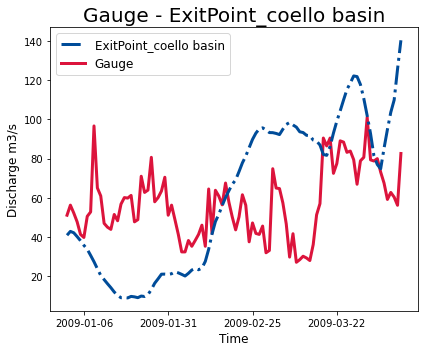

In [16]:
gaugei = 5
plotstart = "2009-01-01"
plotend = "2009-04-10"

Coello.PlotHydrograph(plotstart, plotend, gaugei)

In [18]:
Coello.ListAttributes()

2022-03-19 23:56:56.203 | DEBUG    | catchment:ListAttributes:1473 - 

2022-03-19 23:56:56.204 | DEBUG    | catchment:ListAttributes:1474 - Attributes List of: 'Coello' - Catchment Instance

2022-03-19 23:56:56.205 | DEBUG    | catchment:ListAttributes:1485 - BankfullDepth : None
2022-03-19 23:56:56.205 | DEBUG    | catchment:ListAttributes:1485 - CatArea : 1530
2022-03-19 23:56:56.206 | DEBUG    | catchment:ListAttributes:1485 - CellSize : 4000.0
2022-03-19 23:56:56.207 | DEBUG    | catchment:ListAttributes:1485 - DEM : None
2022-03-19 23:56:56.208 | DEBUG    | catchment:ListAttributes:1485 - ET : array([[[-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        [-3.40282306e+38, -3.40282306e+38, -3.40282306e+38, ...,
         -3.40282306e+38, -3.40282306e+38, -3.40282306e+38],
        ...,
   

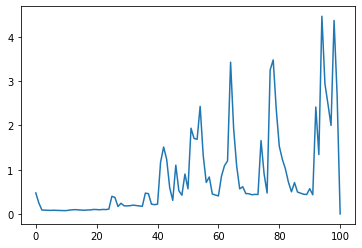

In [19]:
import matplotlib.pyplot as plt


plt.plot(Coello.Qtot[12, 1, :])

### Animation

RuntimeError: Requested MovieWriter (ffmpeg) not available

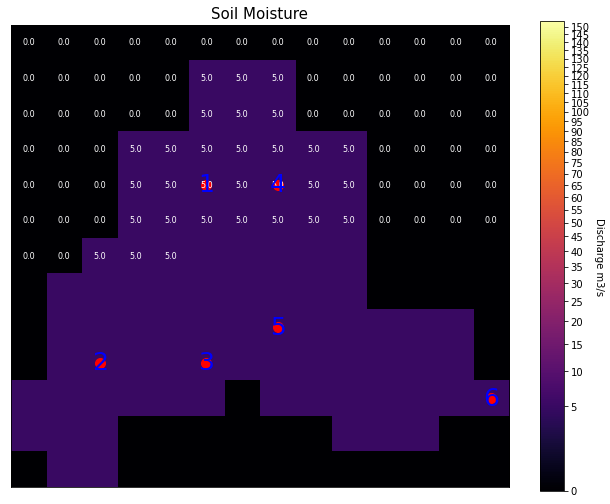

In [20]:
% matplotlib inline
from IPython.display import HTML


plotstart = "2009-01-01"
plotend = "2009-01-20"
Option = 5
threshold = 10

Anim = Coello.PlotDistributedResults(plotstart, plotend, Figsize=(9, 9), Option=Option, threshold=160,
                                     PlotNumbers=False,
                                     TicksSpacing=5, Interval=200, Gauges=True, cmap='inferno', Textloc=[0.1, 0.2],
                                     Gaugecolor='red', ColorScale=2, IDcolor='blue', IDsize=25)
HTML(Anim.to_html5_video())

- if you like to save the animation

In [45]:
SaveTo = Path + "anim.mov"
Coello.SaveAnimation(VideoFormat="mov", Path=SaveTo, SaveFrames=3)

# 11-Store the result into rasters

In [46]:
StartDate = "2009-01-01"
EndDate = "2010-04-20"
Prefix = 'Qtot_'
SaveTo = Path + "/results/"
Coello.SaveResults(FlowAccPath, Result=1, StartDate=StartDate, EndDate=EndDate,
                   Path=SaveTo, Prefix=Prefix)

Data is saved successfully


In [47]:
Path

'Hapi/Model/results/anim.mov'